# TODOs
- [ ] Filter out preseason/playoff games?
- [ ] Get betting odds 
  - [ ] Model out over/under
- [ ] Examine different model types

In [30]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt


In [31]:
games = pd.read_csv('../data/games.csv')

In [32]:
games_details = pd.read_csv('../data/games_details.csv')


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_81046/3835688984.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details = pd.read_csv('../data/games_details.csv')


In [33]:
players = pd.read_csv('../data/players.csv')

In [34]:
teams = pd.read_csv('../data/teams.csv')


In [35]:
ranking = pd.read_csv('../data/ranking.csv')

In [36]:
games_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735392 entries, 0 to 735391
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            735392 non-null  int64  
 1   TEAM_ID            735392 non-null  int64  
 2   TEAM_ABBREVIATION  735392 non-null  object 
 3   TEAM_CITY          735392 non-null  object 
 4   PLAYER_ID          735392 non-null  int64  
 5   PLAYER_NAME        735392 non-null  object 
 6   NICKNAME           119801 non-null  object 
 7   START_POSITION     280585 non-null  object 
 8   COMMENT            122738 non-null  object 
 9   MIN                612651 non-null  object 
 10  FGM                612651 non-null  float64
 11  FGA                612651 non-null  float64
 12  FG_PCT             612651 non-null  float64
 13  FG3M               612651 non-null  float64
 14  FG3A               612651 non-null  float64
 15  FG3_PCT            612651 non-null  float64
 16  FT

In [37]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29133 entries, 0 to 29132
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     29133 non-null  object 
 1   GAME_ID           29133 non-null  int64  
 2   GAME_STATUS_TEXT  29133 non-null  object 
 3   HOME_TEAM_ID      29133 non-null  int64  
 4   VISITOR_TEAM_ID   29133 non-null  int64  
 5   SEASON            29133 non-null  int64  
 6   TEAM_ID_home      29133 non-null  int64  
 7   PTS_home          29034 non-null  float64
 8   FG_PCT_home       29034 non-null  float64
 9   FT_PCT_home       29034 non-null  float64
 10  FG3_PCT_home      29034 non-null  float64
 11  AST_home          29034 non-null  float64
 12  REB_home          29034 non-null  float64
 13  TEAM_ID_away      29133 non-null  int64  
 14  PTS_away          29034 non-null  float64
 15  FG_PCT_away       29034 non-null  float64
 16  FT_PCT_away       29034 non-null  float6

In [38]:
games

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2024-11-15,22400009,Final,1610612754,1610612748,2024,1610612754,111.0,0.512,0.818,...,28.0,39.0,1610612748,124.0,0.517,0.826,0.357,27.0,36.0,0
1,2024-11-15,22400010,Final,1610612753,1610612755,2024,1610612753,98.0,0.436,0.864,...,15.0,43.0,1610612755,86.0,0.403,0.857,0.323,19.0,34.0,1
2,2024-11-15,22400011,Final,1610612761,1610612765,2024,1610612761,95.0,0.361,0.773,...,21.0,53.0,1610612765,99.0,0.411,0.650,0.211,24.0,56.0,0
3,2024-11-15,22400012,Final,1610612737,1610612764,2024,1610612737,129.0,0.469,0.833,...,28.0,55.0,1610612764,117.0,0.406,0.762,0.349,28.0,52.0,1
4,2024-11-15,22400013,Final,1610612739,1610612741,2024,1610612739,144.0,0.548,0.875,...,33.0,40.0,1610612741,126.0,0.511,0.800,0.476,32.0,36.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29128,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
29129,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
29130,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
29131,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


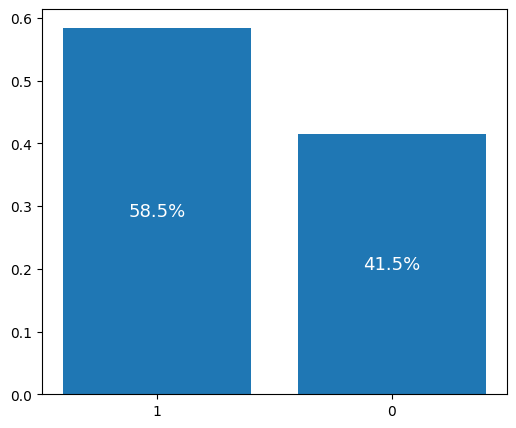

In [39]:
fig, ax = plt.subplots(figsize=(6,5))

v_c = games['HOME_TEAM_WINS'].value_counts(normalize=True)
v_c.index = v_c.index.astype(str)

ax.bar(v_c.index, v_c.values)

for i in ax.patches:
    x, y = i.get_x(), i.get_y()
    w, h = i.get_width(), i.get_height()

    val = str(round(h*100,1)) + '%'

    ax.text(x + w/2, y + h/2, val,
            horizontalalignment='center', verticalalignment='center',
            fontsize=13, color='white')

plt.show()

Baseline is 58.5% of games, the home team wins.

# Examining the standings

Going to look at current record, home and away records on the day of the games

In [40]:
ranking.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612760,0,22024,2024-11-15,West,Oklahoma City,13,11,2,0.846,7-1,4-1,NaN
1,1610612744,0,22024,2024-11-15,West,Golden State,12,10,2,0.833,4-1,6-1,NaN
2,1610612745,0,22024,2024-11-15,West,Houston,13,9,4,0.692,6-2,3-2,NaN
3,1610612756,0,22024,2024-11-15,West,Phoenix,13,9,4,0.692,5-1,4-3,NaN
4,1610612747,0,22024,2024-11-15,West,L.A. Lakers,12,8,4,0.667,6-0,2-4,NaN


In [41]:
def calculate_win_pct(record: str):
    w,l = record.split("-")
    w = int(w)
    l = int(l)
    if w+l ==0:
        return 0
    return w / (w+l)

def format_rankings(r):
    r["HOME_WIN_PCT"] = r["HOME_RECORD"].apply(calculate_win_pct)
    r["AWAY_WIN_PCT"] = r["ROAD_RECORD"].apply(calculate_win_pct)

format_rankings(ranking)
ranking.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY,HOME_WIN_PCT,AWAY_WIN_PCT
0,1610612760,0,22024,2024-11-15,West,Oklahoma City,13,11,2,0.846,7-1,4-1,NaN,0.875000,0.800000
1,1610612744,0,22024,2024-11-15,West,Golden State,12,10,2,0.833,4-1,6-1,NaN,0.800000,0.857143
2,1610612745,0,22024,2024-11-15,West,Houston,13,9,4,0.692,6-2,3-2,NaN,0.750000,0.600000
3,1610612756,0,22024,2024-11-15,West,Phoenix,13,9,4,0.692,5-1,4-3,NaN,0.833333,0.571429
4,1610612747,0,22024,2024-11-15,West,L.A. Lakers,12,8,4,0.667,6-0,2-4,NaN,1.000000,0.333333


# Build Game Features

Initial proposed game features:

* game_date
* home_team_id
* away_team_id
* home_team_record
* away_team_record
* home_team_home_record
* away_team_away_record


In [42]:
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2024-11-15,22400009,Final,1610612754,1610612748,2024,1610612754,111.0,0.512,0.818,...,28.0,39.0,1610612748,124.0,0.517,0.826,0.357,27.0,36.0,0
1,2024-11-15,22400010,Final,1610612753,1610612755,2024,1610612753,98.0,0.436,0.864,...,15.0,43.0,1610612755,86.0,0.403,0.857,0.323,19.0,34.0,1
2,2024-11-15,22400011,Final,1610612761,1610612765,2024,1610612761,95.0,0.361,0.773,...,21.0,53.0,1610612765,99.0,0.411,0.650,0.211,24.0,56.0,0
3,2024-11-15,22400012,Final,1610612737,1610612764,2024,1610612737,129.0,0.469,0.833,...,28.0,55.0,1610612764,117.0,0.406,0.762,0.349,28.0,52.0,1
4,2024-11-15,22400013,Final,1610612739,1610612741,2024,1610612739,144.0,0.548,0.875,...,33.0,40.0,1610612741,126.0,0.511,0.800,0.476,32.0,36.0,1


In [43]:
ranking.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY,HOME_WIN_PCT,AWAY_WIN_PCT
0,1610612760,0,22024,2024-11-15,West,Oklahoma City,13,11,2,0.846,7-1,4-1,NaN,0.875000,0.800000
1,1610612744,0,22024,2024-11-15,West,Golden State,12,10,2,0.833,4-1,6-1,NaN,0.800000,0.857143
2,1610612745,0,22024,2024-11-15,West,Houston,13,9,4,0.692,6-2,3-2,NaN,0.750000,0.600000
3,1610612756,0,22024,2024-11-15,West,Phoenix,13,9,4,0.692,5-1,4-3,NaN,0.833333,0.571429
4,1610612747,0,22024,2024-11-15,West,L.A. Lakers,12,8,4,0.667,6-0,2-4,NaN,1.000000,0.333333


In [44]:
ranking = ranking.sort_values(by='STANDINGSDATE')
ranking.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY,HOME_WIN_PCT,AWAY_WIN_PCT
202376,1610612739,0,22002,2003-10-01,East,Cleveland,82,17,65,0.207,14-27,3-38,NaN,0.341463,0.073171
113769,1610612763,0,22002,2003-10-01,West,Memphis,82,28,54,0.341,20-21,8-33,NaN,0.487805,0.195122
113768,1610612744,0,22002,2003-10-01,West,Golden State,82,38,44,0.463,24-17,14-27,NaN,0.585366,0.341463
113767,1610612760,0,22002,2003-10-01,West,Seattle,82,40,42,0.488,25-16,15-26,NaN,0.609756,0.365854
113766,1610612745,0,22002,2003-10-01,West,Houston,82,43,39,0.524,28-13,15-26,NaN,0.682927,0.365854


In [45]:
ranking.tail()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY,HOME_WIN_PCT,AWAY_WIN_PCT
10414,1610612737,0,22024,2024-11-15,East,Atlanta,13,6,7,0.462,4-4,2-3,NaN,0.500,0.400000
10413,1610612752,0,22024,2024-11-15,East,New York,12,6,6,0.500,3-2,3-4,NaN,0.600,0.428571
10412,1610612753,0,22024,2024-11-15,East,Orlando,14,8,6,0.571,7-0,1-6,NaN,1.000,0.142857
10410,1610612739,0,22024,2024-11-15,East,Cleveland,14,14,0,1.000,7-0,7-0,NaN,1.000,1.000000
0,1610612760,0,22024,2024-11-15,West,Oklahoma City,13,11,2,0.846,7-1,4-1,NaN,0.875,0.800000


In [55]:
def get_b2bs(game, _model_data):
    date = game['GAME_DATETIME_OBJ'] - pd.Timedelta(days=1)
    home_team = game['HOME_TEAM_ID']
    away_team = game['VISITOR_TEAM_ID']
    home_b2b = len(_model_data.loc[(_model_data['GAME_DATETIME_OBJ'] == date) & ((_model_data['HOME_TEAM_ID'] == home_team) | (_model_data['VISITOR_TEAM_ID'] == home_team))])
    away_b2b = len(_model_data.loc[(_model_data['GAME_DATETIME_OBJ'] == date) & ((_model_data['HOME_TEAM_ID'] == away_team) | (_model_data['VISITOR_TEAM_ID'] == away_team))])
    return pd.Series([bool(home_b2b), bool(away_b2b)])

def prepare_games(games):
    _games = games.copy()
    model_data = _games.loc[:, ["GAME_DATE_EST", "HOME_TEAM_ID", "VISITOR_TEAM_ID", "SEASON", "HOME_TEAM_WINS"]]
    model_data["GAME_DATETIME_OBJ"] = pd.to_datetime(_games["GAME_DATE_EST"])
    model_data["GAME_DATETIME"] = model_data["GAME_DATETIME_OBJ"].astype(int)
    model_data = model_data.merge(ranking, left_on=["GAME_DATE_EST", "HOME_TEAM_ID"], right_on=["STANDINGSDATE", "TEAM_ID"])
    model_data = model_data.merge(ranking, left_on=["GAME_DATE_EST", "VISITOR_TEAM_ID"], right_on=["STANDINGSDATE", "TEAM_ID"], suffixes=("_HOME", "_VISITOR"))
    model_data[["HOME_TEAM_B2B","AWAY_TEAM_B2B"]] = model_data.apply(lambda game: get_b2bs(game, model_data), axis=1)
    return model_data[["SEASON", "GAME_DATETIME", "HOME_TEAM_ID", "VISITOR_TEAM_ID", "W_PCT_HOME", "HOME_WIN_PCT_HOME", "W_PCT_VISITOR", "AWAY_WIN_PCT_VISITOR", "HOME_TEAM_WINS", "HOME_TEAM_B2B","AWAY_TEAM_B2B"]]



In [56]:
prepared_games = prepare_games(games)

In [57]:
prepared_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29153 entries, 0 to 29152
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SEASON                29153 non-null  int64  
 1   GAME_DATETIME         29153 non-null  int64  
 2   HOME_TEAM_ID          29153 non-null  int64  
 3   VISITOR_TEAM_ID       29153 non-null  int64  
 4   W_PCT_HOME            29153 non-null  float64
 5   HOME_WIN_PCT_HOME     29153 non-null  float64
 6   W_PCT_VISITOR         29153 non-null  float64
 7   AWAY_WIN_PCT_VISITOR  29153 non-null  float64
 8   HOME_TEAM_WINS        29153 non-null  int64  
 9   HOME_TEAM_B2B         29153 non-null  bool   
 10  AWAY_TEAM_B2B         29153 non-null  bool   
dtypes: bool(2), float64(4), int64(5)
memory usage: 2.1 MB


In [58]:
prepared_games.head()

,SEASON,GAME_DATETIME,HOME_TEAM_ID,VISITOR_TEAM_ID,W_PCT_HOME,HOME_WIN_PCT_HOME,W_PCT_VISITOR,AWAY_WIN_PCT_VISITOR,HOME_TEAM_WINS,HOME_TEAM_B2B,AWAY_TEAM_B2B
0,2024,1731628800000000000,1610612754,1610612748,0.417,0.600000,0.455,0.500000,0,False,False
1,2024,1731628800000000000,1610612753,1610612755,0.571,1.000000,0.167,0.166667,1,False,False
2,2024,1731628800000000000,1610612761,1610612765,0.154,0.333333,0.429,0.428571,0,False,False
3,2024,1731628800000000000,1610612737,1610612764,0.462,0.500000,0.182,0.166667,1,False,False
4,2024,1731628800000000000,1610612739,1610612741,1.000,1.000000,0.385,0.500000,1,False,False


In [59]:
prepared_games.to_csv('prepared_games.csv', index=False)

# Correlation between fields

If fields are highly correlated, may not make sense to include both in the model (they in theory will have the same contribution)

In [60]:
feat_cols = [
    "GAME_DATETIME",
    "HOME_TEAM_ID",
    "VISITOR_TEAM_ID",
    "W_PCT_HOME",
    "HOME_WIN_PCT_HOME",
    "W_PCT_VISITOR",
    "AWAY_WIN_PCT_VISITOR",
    "HOME_TEAM_B2B",
    "AWAY_TEAM_B2B"
]
target = 'HOME_TEAM_WINS'

In [61]:
corr = prepared_games[feat_cols + [target]].corr()

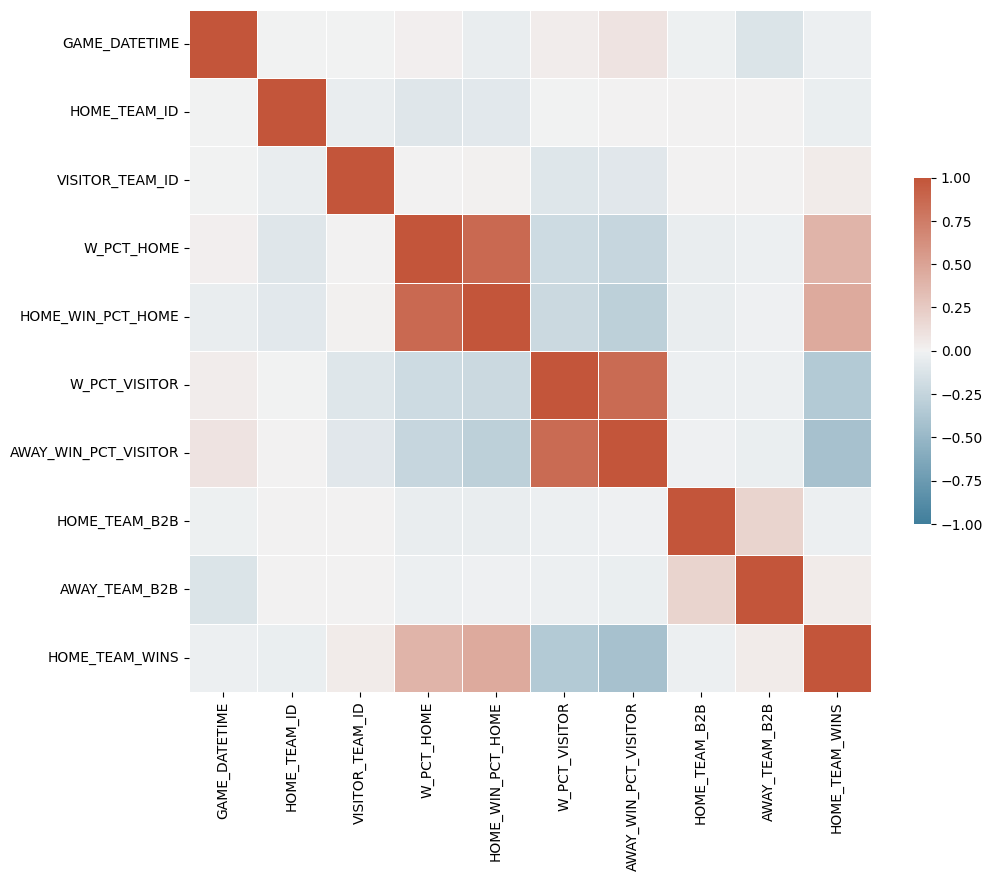

In [62]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1, center=0, vmin=-1, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

There is some correlation between the home/away records and the team's total record, but hopefully there is enough of a difference with how correlated they are. I *think* this is right - need to research more

# Training
2020 - 2023

In [63]:
# from sklearn.model_selection import train_test_split
# X = prepared_games.drop([target, ], axis=1)  # Features
# y = prepared_games[target]  # Target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# using temporal data instead of random selected data


In [64]:
train = prepared_games.loc[(prepared_games['SEASON'] >= 2007) & (prepared_games['SEASON'] <= 2018)]

X_train, y_train = train[feat_cols], train[target]

test = prepared_games.loc[(prepared_games['SEASON'] == 2023)]
X_test, y_test = test[feat_cols], test[target]

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


In [66]:
clf = RandomForestClassifier(random_state=42, n_jobs=2, n_estimators=100, max_depth=7, bootstrap=True)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_jobs=2, random_state=42)

In [67]:
print('Train accuracy:',clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

Train accuracy: 0.770983645983646
Test accuracy: 0.754880694143167


In [68]:
X_train.head()

,GAME_DATETIME,HOME_TEAM_ID,VISITOR_TEAM_ID,W_PCT_HOME,HOME_WIN_PCT_HOME,W_PCT_VISITOR,AWAY_WIN_PCT_VISITOR,HOME_TEAM_B2B,AWAY_TEAM_B2B
6560,1402790400000000000,1610612759,1610612748,0.756,0.780488,0.659,0.536585,False,False
6561,1402531200000000000,1610612748,1610612759,0.659,0.780488,0.756,0.731707,False,False
6562,1402358400000000000,1610612748,1610612759,0.659,0.780488,0.756,0.731707,False,False
6563,1402185600000000000,1610612759,1610612748,0.756,0.780488,0.659,0.536585,False,False
6564,1401926400000000000,1610612759,1610612748,0.756,0.780488,0.659,0.536585,False,False


In [69]:
lr = LogisticRegression(random_state=42, penalty='l2')
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [70]:
print('Train accuracy:',lr.score(X_train, y_train))
print('Test accuracy:', lr.score(X_test, y_test))

Train accuracy: 0.5941558441558441
Test accuracy: 0.549530007230658


In [71]:
from sklearn.metrics import ConfusionMatrixDisplay

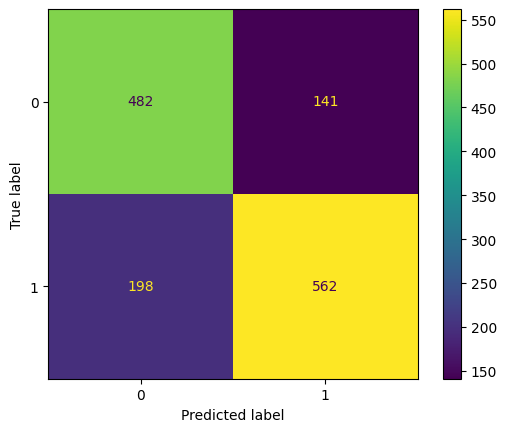

In [72]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

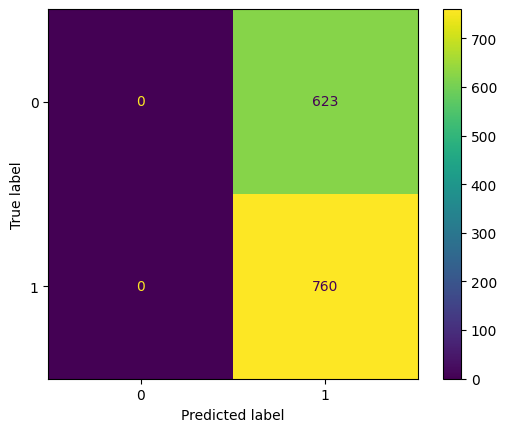

In [73]:
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)

# Testing Results in a single season
Going to take the first half of the season (60%, 70%, etc), and see if model predictions hold

In [74]:
season_2023 = prepared_games.loc[(prepared_games['SEASON'] == 2023)].sort_values(by="GAME_DATETIME")

In [75]:
season_2023.head()

,SEASON,GAME_DATETIME,HOME_TEAM_ID,VISITOR_TEAM_ID,W_PCT_HOME,HOME_WIN_PCT_HOME,W_PCT_VISITOR,AWAY_WIN_PCT_VISITOR,HOME_TEAM_WINS,HOME_TEAM_B2B,AWAY_TEAM_B2B
1639,2023,1696464000000000000,1610612750,1610612742,1.0,1.0,0.0,0.0,1,False,False
1638,2023,1696636800000000000,1610612744,1610612747,1.0,1.0,0.0,0.0,1,False,False
1637,2023,1696636800000000000,1610612742,1610612750,0.0,0.0,1.0,1.0,0,False,False
1636,2023,1696723200000000000,1610612746,1610612762,0.0,0.0,1.0,1.0,0,False,False
1635,2023,1696723200000000000,1610612761,1610612758,1.0,1.0,0.0,0.0,1,False,False


In [76]:
season_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1383 entries, 1639 to 257
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SEASON                1383 non-null   int64  
 1   GAME_DATETIME         1383 non-null   int64  
 2   HOME_TEAM_ID          1383 non-null   int64  
 3   VISITOR_TEAM_ID       1383 non-null   int64  
 4   W_PCT_HOME            1383 non-null   float64
 5   HOME_WIN_PCT_HOME     1383 non-null   float64
 6   W_PCT_VISITOR         1383 non-null   float64
 7   AWAY_WIN_PCT_VISITOR  1383 non-null   float64
 8   HOME_TEAM_WINS        1383 non-null   int64  
 9   HOME_TEAM_B2B         1383 non-null   bool   
 10  AWAY_TEAM_B2B         1383 non-null   bool   
dtypes: bool(2), float64(4), int64(5)
memory usage: 110.7 KB


In [77]:
train_1, train_2, test = np.array_split(season_2023, 3)
train = pd.concat([train_1, train_2])
X_train, y_train = train[feat_cols], train[target]

X_test, y_test = test[feat_cols], test[target]

/Users/derek.gliwa/personal_dev/nba-data-scrapping/.venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 922 entries, 1639 to 718
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SEASON                922 non-null    int64  
 1   GAME_DATETIME         922 non-null    int64  
 2   HOME_TEAM_ID          922 non-null    int64  
 3   VISITOR_TEAM_ID       922 non-null    int64  
 4   W_PCT_HOME            922 non-null    float64
 5   HOME_WIN_PCT_HOME     922 non-null    float64
 6   W_PCT_VISITOR         922 non-null    float64
 7   AWAY_WIN_PCT_VISITOR  922 non-null    float64
 8   HOME_TEAM_WINS        922 non-null    int64  
 9   HOME_TEAM_B2B         922 non-null    bool   
 10  AWAY_TEAM_B2B         922 non-null    bool   
dtypes: bool(2), float64(4), int64(5)
memory usage: 73.8 KB


In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 461 entries, 717 to 257
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SEASON                461 non-null    int64  
 1   GAME_DATETIME         461 non-null    int64  
 2   HOME_TEAM_ID          461 non-null    int64  
 3   VISITOR_TEAM_ID       461 non-null    int64  
 4   W_PCT_HOME            461 non-null    float64
 5   HOME_WIN_PCT_HOME     461 non-null    float64
 6   W_PCT_VISITOR         461 non-null    float64
 7   AWAY_WIN_PCT_VISITOR  461 non-null    float64
 8   HOME_TEAM_WINS        461 non-null    int64  
 9   HOME_TEAM_B2B         461 non-null    bool   
 10  AWAY_TEAM_B2B         461 non-null    bool   
dtypes: bool(2), float64(4), int64(5)
memory usage: 36.9 KB


In [80]:
test["GAME_DATETIME"].describe()

count    4.610000e+02
mean     1.711783e+18
std      1.965111e+15
min      1.708906e+18
25%      1.710202e+18
50%      1.711498e+18
75%      1.712880e+18
max      1.718582e+18
Name: GAME_DATETIME, dtype: float64

In [81]:
train["GAME_DATETIME"].describe()

count    9.220000e+02
mean     1.702912e+18
std      3.321823e+15
min      1.696464e+18
25%      1.700114e+18
50%      1.703030e+18
75%      1.705709e+18
max      1.708906e+18
Name: GAME_DATETIME, dtype: float64

In [82]:
clf = RandomForestClassifier(random_state=42, n_jobs=2, n_estimators=100, max_depth=7, bootstrap=True)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_jobs=2, random_state=42)

In [83]:
print('Train accuracy:',clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

Train accuracy: 0.89587852494577
Test accuracy: 0.6507592190889371


# Comparing results across all seasons

In [84]:
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2024-11-15,22400009,Final,1610612754,1610612748,2024,1610612754,111.0,0.512,0.818,...,28.0,39.0,1610612748,124.0,0.517,0.826,0.357,27.0,36.0,0
1,2024-11-15,22400010,Final,1610612753,1610612755,2024,1610612753,98.0,0.436,0.864,...,15.0,43.0,1610612755,86.0,0.403,0.857,0.323,19.0,34.0,1
2,2024-11-15,22400011,Final,1610612761,1610612765,2024,1610612761,95.0,0.361,0.773,...,21.0,53.0,1610612765,99.0,0.411,0.650,0.211,24.0,56.0,0
3,2024-11-15,22400012,Final,1610612737,1610612764,2024,1610612737,129.0,0.469,0.833,...,28.0,55.0,1610612764,117.0,0.406,0.762,0.349,28.0,52.0,1
4,2024-11-15,22400013,Final,1610612739,1610612741,2024,1610612739,144.0,0.548,0.875,...,33.0,40.0,1610612741,126.0,0.511,0.800,0.476,32.0,36.0,1


In [85]:
games["SEASON"].min()

np.int64(2003)

In [86]:
def calculate_season(s):
    season = prepared_games.loc[(prepared_games['SEASON'] == s)].sort_values(by="GAME_DATETIME")
    train_1, test = np.array_split(season, 2)
    train = pd.concat([train_1])
    X_train, y_train = train[feat_cols], train[target]

    X_test, y_test = test[feat_cols], test[target]
    clf = RandomForestClassifier(random_state=42, n_jobs=2, n_estimators=100, max_depth=7, bootstrap=True)
    clf.fit(X_train, y_train)
    print('Train accuracy:',clf.score(X_train, y_train))
    print('Test accuracy:', clf.score(X_test, y_test))
    # importances = clf.feature_importances_
    # plt.figure(figsize=(8, 4))
    # plt.barh(feat_cols, importances, color='skyblue')
    # plt.xlabel('Gini Importance')
    # plt.title('Feature Importance - Gini Importance')
    # plt.gca().invert_yaxis()  # Invert y-axis for better visualization
    # plt.show()

In [87]:
import warnings
warnings.filterwarnings('ignore')
for s in range(2003, 2024):
    print("******* CALCULATING SEASON **********")
    print(s)
    calculate_season(s)

******* CALCULATING SEASON **********
2003
Train accuracy: 0.9033189033189033
Test accuracy: 0.6763005780346821
******* CALCULATING SEASON **********
2004
Train accuracy: 0.9045521292217328
Test accuracy: 0.6960352422907489
******* CALCULATING SEASON **********
2005
Train accuracy: 0.8994413407821229
Test accuracy: 0.7039106145251397
******* CALCULATING SEASON **********
2006
Train accuracy: 0.9014084507042254
Test accuracy: 0.6643159379407616
******* CALCULATING SEASON **********
2007
Train accuracy: 0.9107648725212465
Test accuracy: 0.7148936170212766
******* CALCULATING SEASON **********
2008
Train accuracy: 0.9186535764375876
Test accuracy: 0.7205056179775281
******* CALCULATING SEASON **********
2009
Train accuracy: 0.9157303370786517
Test accuracy: 0.6924157303370787
******* CALCULATING SEASON **********
2010
Train accuracy: 0.9127988748241913
Test accuracy: 0.7060478199718706
******* CALCULATING SEASON **********
2011
Train accuracy: 0.9438405797101449
Test accuracy: 0.686594202

# Maybe look at recent performance (last 10, 20, etc)

In [88]:
games.sample(10)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
4334,2021-10-20,22100003,Final,1610612766,1610612754,2021,1610612766,123.0,0.430,0.667,...,29.0,46.0,1610612754,122.0,0.467,0.875,0.362,29.0,51.0,1
8401,2013-03-03,21200888,Final,1610612747,1610612737,2012,1610612747,99.0,0.487,0.722,...,21.0,43.0,1610612737,98.0,0.500,0.533,0.364,34.0,36.0,1
13098,2009-11-13,20900129,Final,1610612740,1610612757,2009,1610612740,78.0,0.367,0.773,...,17.0,40.0,1610612757,86.0,0.379,0.692,0.154,14.0,60.0,0
6137,2020-01-28,21900704,Final,1610612763,1610612743,2019,1610612763,104.0,0.561,0.429,...,32.0,41.0,1610612743,96.0,0.372,0.833,0.378,23.0,44.0,1
1435,2023-11-12,22300179,Final,1610612746,1610612763,2023,1610612746,101.0,0.435,0.652,...,26.0,41.0,1610612763,105.0,0.420,0.750,0.317,25.0,41.0,0
21059,2004-01-21,20300603,Final,1610612743,1610612756,2003,1610612743,97.0,0.507,0.793,...,23.0,39.0,1610612756,92.0,0.442,0.667,0.182,24.0,43.0,1
24572,2017-11-21,21700252,Final,1610612747,1610612741,2017,1610612747,103.0,0.400,0.720,...,23.0,53.0,1610612741,94.0,0.383,0.688,0.306,22.0,54.0,1
13013,2009-11-25,20900215,Final,1610612745,1610612742,2009,1610612745,99.0,0.458,0.621,...,22.0,33.0,1610612742,130.0,0.655,0.786,0.529,33.0,36.0,0
13111,2009-11-11,20900116,Final,1610612750,1610612757,2009,1610612750,84.0,0.442,0.833,...,16.0,29.0,1610612757,107.0,0.553,0.867,0.400,30.0,41.0,0
5770,2020-08-10,21901294,Final,1610612749,1610612761,2019,1610612749,106.0,0.393,0.743,...,25.0,49.0,1610612761,114.0,0.433,0.692,0.300,24.0,55.0,0


In [89]:
teams.sample(5)

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
6,0,1610612745,1967,2019,HOU,Rockets,1967,Houston,Toyota Center,18104.0,Tilman Fertitta,Daryl Morey,Mike D'Antoni,Rio Grande Valley Vipers
7,0,1610612746,1970,2019,LAC,Clippers,1970,Los Angeles,Staples Center,19060.0,Steve Ballmer,Michael Winger,Doc Rivers,Agua Caliente Clippers of Ontario
11,0,1610612750,1989,2019,MIN,Timberwolves,1989,Minnesota,Target Center,19356.0,Glen Taylor,Scott Layden,Ryan Saunders,Iowa Wolves
9,0,1610612748,1988,2019,MIA,Heat,1988,Miami,AmericanAirlines Arena,19600.0,Micky Arison,Pat Riley,Erik Spoelstra,Sioux Falls Skyforce
12,0,1610612751,1976,2019,BKN,Nets,1976,Brooklyn,Barclays Center,NaN,Joe Tsai,Sean Marks,Kenny Atkinson,Long Island Nets


In [90]:
_games = games.copy()
team_id = 1610612753 #orlando's ID
orl = season_2023[(season_2023['HOME_TEAM_ID'] == team_id) | (season_2023['VISITOR_TEAM_ID'] == team_id)]
orl.loc[:,'is_home'] = _games['TEAM_ID_home'] == team_id
orl.loc[:,'WIN_PRCT'] = orl['is_home'] == orl['HOME_TEAM_WINS']
orl = orl.reset_index().drop(columns="index")
orl.head()
# orl[orl['GAME_DATETIME_OBJ'] == orl['GAME_DATETIME_OBJ'] - pd.Timedelta(days=1)]

,SEASON,GAME_DATETIME,HOME_TEAM_ID,VISITOR_TEAM_ID,W_PCT_HOME,HOME_WIN_PCT_HOME,W_PCT_VISITOR,AWAY_WIN_PCT_VISITOR,HOME_TEAM_WINS,HOME_TEAM_B2B,AWAY_TEAM_B2B,is_home,WIN_PRCT
0,2023,1696896000000000000,1610612740,1610612753,0.000,0.0,1.00,1.0,0,False,False,False,True
1,2023,1697068800000000000,1610612739,1610612753,0.000,0.0,1.00,1.0,0,False,False,False,True
2,2023,1697500800000000000,1610612753,1610612740,0.667,0.0,0.25,0.5,0,False,False,True,False
3,2023,1698192000000000000,1610612753,1610612745,1.000,1.0,0.00,0.0,1,False,False,True,True
4,2023,1698364800000000000,1610612757,1610612753,0.000,0.0,1.00,1.0,0,False,False,False,True


In [94]:
def enrich_game_data(games):
    _games = games.copy()
    model_data = _games.loc[:, ["GAME_ID", "GAME_DATE_EST", "HOME_TEAM_ID", "VISITOR_TEAM_ID", "SEASON", "HOME_TEAM_WINS"]]
    model_data["GAME_DATETIME_OBJ"] = pd.to_datetime(_games["GAME_DATE_EST"])
    model_data["GAME_DATETIME"] = model_data["GAME_DATETIME_OBJ"].astype(int)
    model_data = model_data.merge(ranking, left_on=["GAME_DATE_EST", "HOME_TEAM_ID"], right_on=["STANDINGSDATE", "TEAM_ID"])
    model_data = model_data.merge(ranking, left_on=["GAME_DATE_EST", "VISITOR_TEAM_ID"], right_on=["STANDINGSDATE", "TEAM_ID"], suffixes=("_HOME", "_VISITOR"))
    # model_data[["HOME_TEAM_B2B","AWAY_TEAM_B2B"]] = model_data.apply(lambda game: get_b2bs(game, model_data), axis=1)
    # return model_data[["SEASON", "GAME_DATETIME", "HOME_TEAM_ID", "VISITOR_TEAM_ID", "W_PCT_HOME", "HOME_WIN_PCT_HOME", "W_PCT_VISITOR", "AWAY_WIN_PCT_VISITOR", "HOME_TEAM_WINS", "HOME_TEAM_B2B","AWAY_TEAM_B2B"]]
    return model_data

In [95]:
enriched_games = enrich_game_data(games).sort_values(by="GAME_DATETIME")

In [96]:
enriched_games.head()

,GAME_ID,GAME_DATE_EST,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,HOME_TEAM_WINS,GAME_DATETIME_OBJ,GAME_DATETIME,TEAM_ID_HOME,LEAGUE_ID_HOME,...,TEAM_VISITOR,G_VISITOR,W_VISITOR,L_VISITOR,W_PCT_VISITOR,HOME_RECORD_VISITOR,ROAD_RECORD_VISITOR,RETURNTOPLAY_VISITOR,HOME_WIN_PCT_VISITOR,AWAY_WIN_PCT_VISITOR
21790,10300001,2003-10-05,1610612762,1610612742,2003,1,2003-10-05,1065312000000000000,1610612762,0,...,Dallas,0,0,0,0.0,0-0,0-0,NaN,0.0,0.0
21789,10300002,2003-10-06,1610612763,1610612749,2003,1,2003-10-06,1065398400000000000,1610612763,0,...,Milwaukee,0,0,0,0.0,0-0,0-0,NaN,0.0,0.0
21782,10300010,2003-10-07,1610612764,1610612752,2003,1,2003-10-07,1065484800000000000,1610612764,0,...,New York,0,0,0,0.0,0-0,0-0,NaN,0.0,0.0
21788,10300009,2003-10-07,1610612758,1610612746,2003,1,2003-10-07,1065484800000000000,1610612758,0,...,L.A. Clippers,0,0,0,0.0,0-0,0-0,NaN,0.0,0.0
21787,10300005,2003-10-07,1610612757,1610612745,2003,1,2003-10-07,1065484800000000000,1610612757,0,...,Houston,0,0,0,0.0,0-0,0-0,NaN,0.0,0.0


In [112]:
team_id = 1610612753 #orlando's ID
prep_2023 = enriched_games[prepared_games["SEASON"] == 2023]
orl = prep_2023[(prep_2023['HOME_TEAM_ID'] == team_id) | (prep_2023['VISITOR_TEAM_ID'] == team_id)]
orl.loc[:,'IS_HOME'] = orl['HOME_TEAM_ID'] == team_id
orl.loc[:,'WIN_PRCT'] = orl['IS_HOME'] == orl['HOME_TEAM_WINS']

orl.loc[:, "PREV_GAME_DATETIME_OBJ"] = orl["GAME_DATETIME_OBJ"].shift(1)
orl.loc[:,'B2B'] = orl["PREV_GAME_DATETIME_OBJ"] == orl["GAME_DATETIME_OBJ"] - pd.Timedelta(days=1)
orl = orl.reset_index().drop(columns="index")
orl[orl["B2B"]]

orl.loc[:, "LAST_10_WIN_PCT"] = orl[["WIN_PRCT"]].rolling(10, min_periods=1).mean()
display(orl)


,GAME_ID,GAME_DATE_EST,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,HOME_TEAM_WINS,GAME_DATETIME_OBJ,GAME_DATETIME,TEAM_ID_HOME,LEAGUE_ID_HOME,...,HOME_RECORD_VISITOR,ROAD_RECORD_VISITOR,RETURNTOPLAY_VISITOR,HOME_WIN_PCT_VISITOR,AWAY_WIN_PCT_VISITOR,IS_HOME,WIN_PRCT,PREV_GAME_DATETIME_OBJ,B2B,LAST_10_WIN_PCT
0,12300019,2023-10-10,1610612740,1610612753,2023,0,2023-10-10,1696896000000000000,1610612740,0,...,0-0,1-0,NaN,0.000000,1.000000,False,True,NaT,False,1.000000
1,12300026,2023-10-12,1610612739,1610612753,2023,0,2023-10-12,1697068800000000000,1610612739,0,...,0-0,2-0,NaN,0.000000,1.000000,False,True,2023-10-10,False,1.000000
2,12300050,2023-10-17,1610612753,1610612740,2023,0,2023-10-17,1697500800000000000,1610612753,0,...,0-2,1-1,NaN,0.000000,0.500000,True,False,2023-10-12,False,0.666667
3,22300066,2023-10-25,1610612753,1610612745,2023,1,2023-10-25,1698192000000000000,1610612753,0,...,0-0,0-1,NaN,0.000000,0.000000,True,True,2023-10-17,False,0.750000
4,22300086,2023-10-27,1610612757,1610612753,2023,0,2023-10-27,1698364800000000000,1610612757,0,...,1-0,1-0,NaN,1.000000,1.000000,False,True,2023-10-25,False,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,42300133,2024-04-25,1610612753,1610612739,2023,1,2024-04-25,1714003200000000000,1610612753,0,...,26-15,22-19,NaN,0.634146,0.536585,True,True,2024-04-22,False,0.400000
88,42300134,2024-04-27,1610612753,1610612739,2023,1,2024-04-27,1714176000000000000,1610612753,0,...,26-15,22-19,NaN,0.634146,0.536585,True,True,2024-04-25,False,0.400000
89,42300135,2024-04-30,1610612739,1610612753,2023,1,2024-04-30,1714435200000000000,1610612739,0,...,29-12,18-23,NaN,0.707317,0.439024,False,False,2024-04-27,False,0.400000
90,42300136,2024-05-03,1610612753,1610612739,2023,1,2024-05-03,1714694400000000000,1610612753,0,...,26-15,22-19,NaN,0.634146,0.536585,True,True,2024-04-30,False,0.400000


In [197]:
def enrich_game_data(_games):
    model_data = _games.loc[:, ["GAME_ID", "GAME_DATE_EST", "HOME_TEAM_ID", "VISITOR_TEAM_ID", "SEASON", "HOME_TEAM_WINS"]]
    model_data["GAME_DATETIME_OBJ"] = pd.to_datetime(_games["GAME_DATE_EST"])
    model_data["GAME_DATETIME"] = model_data["GAME_DATETIME_OBJ"].astype(int)
    model_data = model_data.merge(ranking, left_on=["GAME_DATE_EST", "HOME_TEAM_ID"], right_on=["STANDINGSDATE", "TEAM_ID"])
    model_data = model_data.merge(ranking, left_on=["GAME_DATE_EST", "VISITOR_TEAM_ID"], right_on=["STANDINGSDATE", "TEAM_ID"], suffixes=("_HOME", "_VISITOR"))
    # model_data[["HOME_TEAM_B2B","AWAY_TEAM_B2B"]] = model_data.apply(lambda game: get_b2bs(game, model_data), axis=1)
    # return model_data[["SEASON", "GAME_DATETIME", "HOME_TEAM_ID", "VISITOR_TEAM_ID", "W_PCT_HOME", "HOME_WIN_PCT_HOME", "W_PCT_VISITOR", "AWAY_WIN_PCT_VISITOR", "HOME_TEAM_WINS", "HOME_TEAM_B2B","AWAY_TEAM_B2B"]]
    return model_data

def prepare_games(games):
    _games = enrich_game_data(games.copy())

    def calc_game_lookback_data(game):
        home_team_id = game['HOME_TEAM_ID']
        home_b2bs = calc_b2b(home_team_id)
        home_b2bs = home_b2bs[home_b2bs["GAME_ID"] == game["GAME_ID"]]
        home_b2bs.drop(columns="GAME_ID", inplace=True)
        home_last_10_win_pct = calc_last_n_win_pct(home_team_id, 10)
        home_last_10_win_pct = home_last_10_win_pct[home_last_10_win_pct["GAME_ID"] == game["GAME_ID"]]
        home_last_10_win_pct.drop(columns="GAME_ID", inplace=True)
        home_lookback_data = pd.concat([home_b2bs, home_last_10_win_pct], axis=1).add_prefix('HOME_')
        if len(home_lookback_data) > 1:
            print(game["GAME_ID"])

        away_team_id = game['VISITOR_TEAM_ID']
        away_b2bs = calc_b2b(away_team_id)
        away_b2bs = away_b2bs[away_b2bs["GAME_ID"] == game["GAME_ID"]]
        away_b2bs.drop(columns="GAME_ID", inplace=True)
        away_last_10_win_pct = calc_last_n_win_pct(away_team_id, 10)
        away_last_10_win_pct = away_last_10_win_pct[away_last_10_win_pct["GAME_ID"] == game["GAME_ID"]]
        away_last_10_win_pct.drop(columns="GAME_ID", inplace=True)
        away_lookback_data = pd.concat([away_b2bs, away_last_10_win_pct], axis=1).add_prefix('AWAY_')

        if len(away_lookback_data) > 1:
            print(game["GAME_ID"])


        lookback_data = pd.concat([game.to_frame().T, home_lookback_data, away_lookback_data], axis=1)
        return lookback_data


    def calc_b2b(team_id):
        _game = _games[(_games['HOME_TEAM_ID'] == team_id) | (_games['VISITOR_TEAM_ID'] == team_id)]

        _game.loc[:, "PREV_GAME_DATETIME_OBJ"] = _game["GAME_DATETIME_OBJ"].shift(1)
        _game.loc[:,'B2B'] = _game["PREV_GAME_DATETIME_OBJ"] == _game["GAME_DATETIME_OBJ"] - pd.Timedelta(days=1)
        return _game[["GAME_ID", "B2B"]]

    def calc_last_n_win_pct(team_id, n):
        _game = _games[(_games['HOME_TEAM_ID'] == team_id) | (_games['VISITOR_TEAM_ID'] == team_id)]
        _game.loc[:,'IS_HOME'] = _game['HOME_TEAM_ID'] == team_id
        _game.loc[:,'WIN_PRCT'] = _game['IS_HOME'] == _game['HOME_TEAM_WINS']
        rolling_win_pct = _game["WIN_PRCT"].rolling(n, min_periods=1).mean().rename(f"LAST_{n}_WIN_PCT")
        return pd.concat([_game["GAME_ID"], rolling_win_pct], axis=1)

    return pd.concat(_games.apply(calc_game_lookback_data, axis=1).tolist())

In [223]:
team_id = 1610612753 #orlando's ID
orl = season_2023[(season_2023['HOME_TEAM_ID'] == team_id) | (season_2023['VISITOR_TEAM_ID'] == team_id)]
orl_games = enriched_games[(enriched_games["SEASON"] == 2023) & ((enriched_games["HOME_TEAM_ID"] == team_id) | (enriched_games["VISITOR_TEAM_ID"] == team_id))]
game_data = prepare_games(orl_games)
game_data[["GAME_ID", "HOME_TEAM_WINS", "HOME_TEAM_ID", "VISITOR_TEAM_ID", "HOME_B2B", "AWAY_B2B", "HOME_LAST_10_WIN_PCT", "AWAY_LAST_10_WIN_PCT"]]
game_data[(game_data["HOME_TEAM_WINS"] != 1) & (game_data["HOME_TEAM_WINS"] != 0)]

,GAME_ID,GAME_DATE_EST,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,HOME_TEAM_WINS,GAME_DATETIME_OBJ,GAME_DATETIME,TEAM_ID_HOME,LEAGUE_ID_HOME,...,W_PCT_VISITOR,HOME_RECORD_VISITOR,ROAD_RECORD_VISITOR,RETURNTOPLAY_VISITOR,HOME_WIN_PCT_VISITOR,AWAY_WIN_PCT_VISITOR,HOME_B2B,HOME_LAST_10_WIN_PCT,AWAY_B2B,AWAY_LAST_10_WIN_PCT


In [198]:
prepared_games = prepare_games(games)
prepared_games.head()

,GAME_ID,GAME_DATE_EST,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,HOME_TEAM_WINS,GAME_DATETIME_OBJ,GAME_DATETIME,TEAM_ID_HOME,LEAGUE_ID_HOME,...,W_PCT_VISITOR,HOME_RECORD_VISITOR,ROAD_RECORD_VISITOR,RETURNTOPLAY_VISITOR,HOME_WIN_PCT_VISITOR,AWAY_WIN_PCT_VISITOR,HOME_B2B,HOME_LAST_10_WIN_PCT,AWAY_B2B,AWAY_LAST_10_WIN_PCT
0,22400009,2024-11-15,1610612754,1610612748,2024,0,2024-11-15 00:00:00,1731628800000000000,1610612754,0,...,0.455,1-3,3-3,NaN,0.25,0.5,False,0.0,False,1.0
1,22400010,2024-11-15,1610612753,1610612755,2024,1,2024-11-15 00:00:00,1731628800000000000,1610612753,0,...,0.167,1-5,1-5,NaN,0.166667,0.166667,False,1.0,False,0.0
2,22400011,2024-11-15,1610612761,1610612765,2024,0,2024-11-15 00:00:00,1731628800000000000,1610612761,0,...,0.429,3-4,3-4,NaN,0.428571,0.428571,False,0.0,False,1.0
3,22400012,2024-11-15,1610612737,1610612764,2024,1,2024-11-15 00:00:00,1731628800000000000,1610612737,0,...,0.182,1-3,1-5,NaN,0.25,0.166667,False,1.0,False,0.0
4,22400013,2024-11-15,1610612739,1610612741,2024,1,2024-11-15 00:00:00,1731628800000000000,1610612739,0,...,0.385,1-4,4-4,NaN,0.2,0.5,False,1.0,False,0.0


In [222]:
prepared_games[(prepared_games["HOME_TEAM_WINS"] != 1) & (prepared_games["HOME_TEAM_WINS"] != 0)]

,GAME_ID,GAME_DATE_EST,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,HOME_TEAM_WINS,GAME_DATETIME_OBJ,GAME_DATETIME,TEAM_ID_HOME,LEAGUE_ID_HOME,...,W_PCT_VISITOR,HOME_RECORD_VISITOR,ROAD_RECORD_VISITOR,RETURNTOPLAY_VISITOR,HOME_WIN_PCT_VISITOR,AWAY_WIN_PCT_VISITOR,HOME_B2B,HOME_LAST_10_WIN_PCT,AWAY_B2B,AWAY_LAST_10_WIN_PCT
5597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.3,False,0.6
5598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.6,False,0.4
4963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.7,False,0.2
4962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.6,False,0.3
5599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.6,False,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.4,False,0.4
5035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.7,False,0.7
5037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.7,False,0.3
5040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.2,False,0.5


## Retraining with the new columns (HOME_LAST_10_WIN_PCT, AWAY_LAST_10_WIN_PCT)

In [189]:
feat_cols = [
    "GAME_DATETIME",
    "HOME_TEAM_ID",
    "VISITOR_TEAM_ID",
    "W_PCT_HOME",
    "HOME_WIN_PCT_HOME",
    "W_PCT_VISITOR",
    "AWAY_WIN_PCT_VISITOR",
    "HOME_B2B",
    "AWAY_B2B",
    "HOME_LAST_10_WIN_PCT",
    "AWAY_LAST_10_WIN_PCT"
]
target = 'HOME_TEAM_WINS'

In [190]:
def calculate_season(s):
    season = prepared_games.loc[(prepared_games['SEASON'] == s)].sort_values(by="GAME_DATETIME")
    train_1, test = np.array_split(season, 2)
    train = pd.concat([train_1])
    X_train, y_train = train[feat_cols], train[target]

    X_test, y_test = test[feat_cols], test[target]
    clf = RandomForestClassifier(random_state=42, n_jobs=2, n_estimators=100, max_depth=7, bootstrap=True)
    clf.fit(X_train, y_train)
    print('Train accuracy:',clf.score(X_train, y_train))
    print('Test accuracy:', clf.score(X_test, y_test))
    importances = clf.feature_importances_
    plt.figure(figsize=(8, 4))
    plt.barh(feat_cols, importances, color='skyblue')
    plt.xlabel('Gini Importance')
    plt.title('Feature Importance - Gini Importance')
    plt.gca().invert_yaxis()  # Invert y-axis for better visualization
    plt.show()

ValueError: Unknown label type: unknown. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.